#시작

##코랩 연동

GPU로 다시 돌릴것

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')
submission1 = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')
final_submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## null 값 확인

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

## 신용점수와 비교

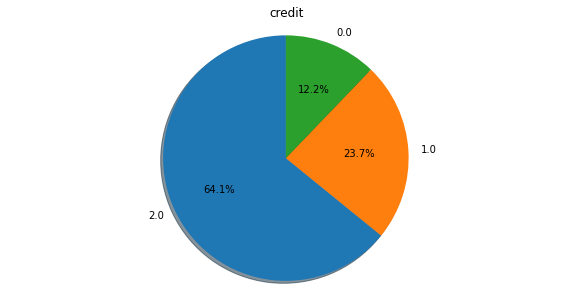

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['credit'].value_counts(),labels = train['credit'].value_counts().index,
        autopct='%0.1f%%', shadow = True, startangle=90) 
plt.title("credit")
plt.axis('equal')
plt.show()

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [ ]:
def chart(feature):

  sns.set_style('whitegrid')

  plt.figure(figsize = (17,10))
  p1 = plt.subplot(1,3,1)
  graph1 = sns.countplot(x= feature, palette='Set1', data= train_0, order = train_0[feature].value_counts().index)
  plt.title("credit_0")


  p2 = plt.subplot(1,3,2)
  graph2 = sns.countplot(x= feature, palette='Set1',  data= train_1, order = train_1[feature].value_counts().index)
  plt.title("credit_1")


  p3 = plt.subplot(1,3,3)
  graph3 = sns.countplot(x= feature, palette='Set1',  data= train_2, order = train_2[feature].value_counts().index)
  plt.title("credit_2")
  

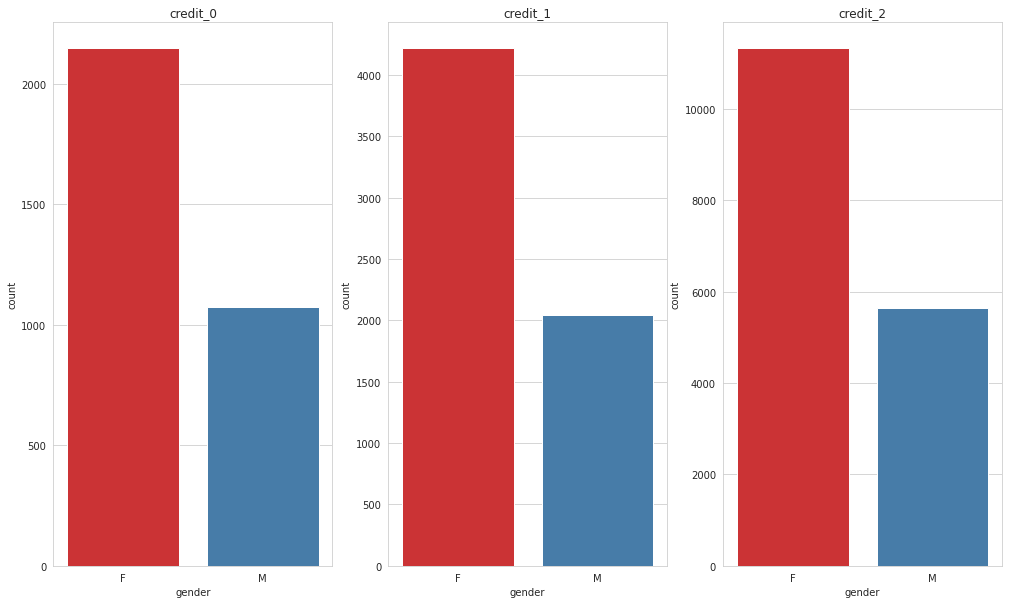

In [ ]:
#성별
chart('gender')

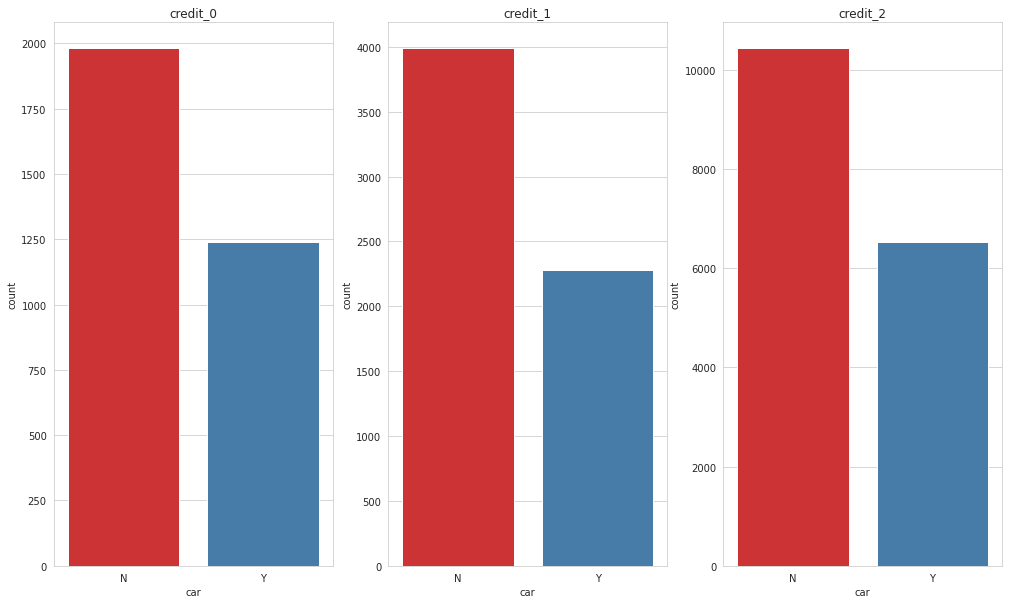

In [ ]:
#자동차 소유 유무
chart('car')

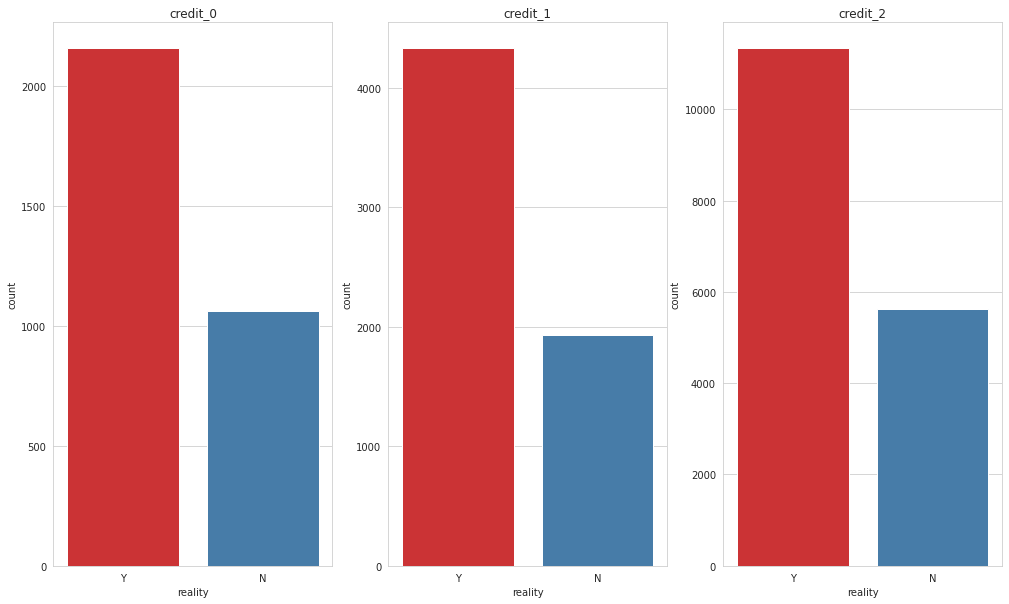

In [ ]:
#부동산 소유 여부
chart('reality')

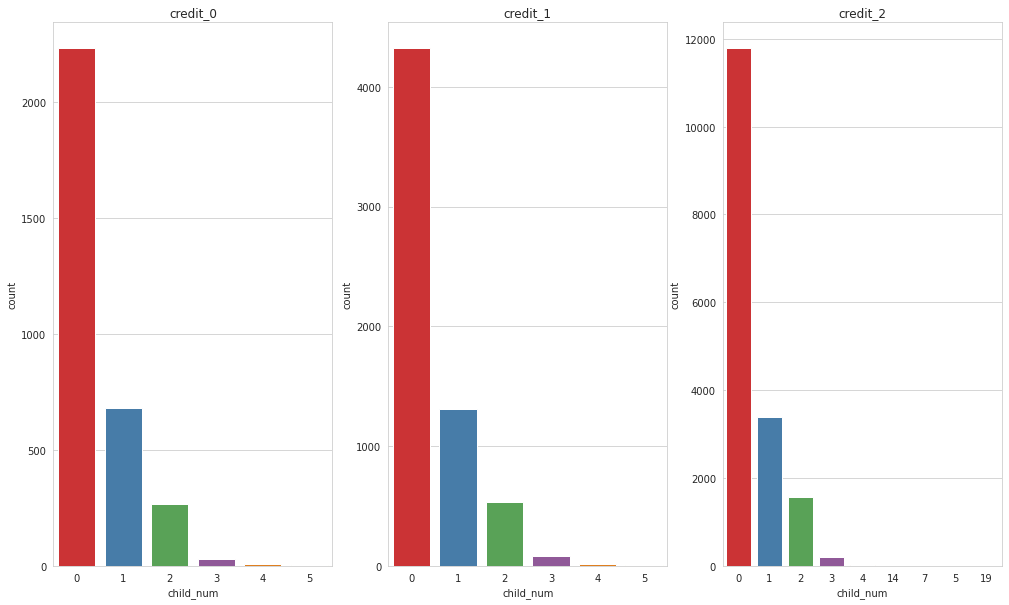

In [ ]:
# 자녀 수
chart('child_num')

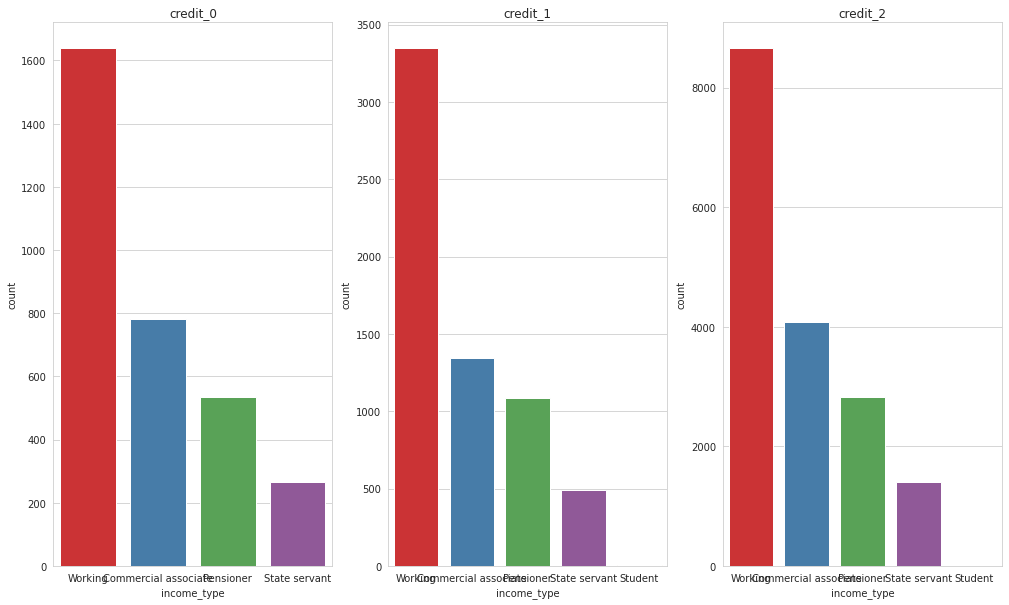

In [ ]:
# 소득 유형
chart('income_type')

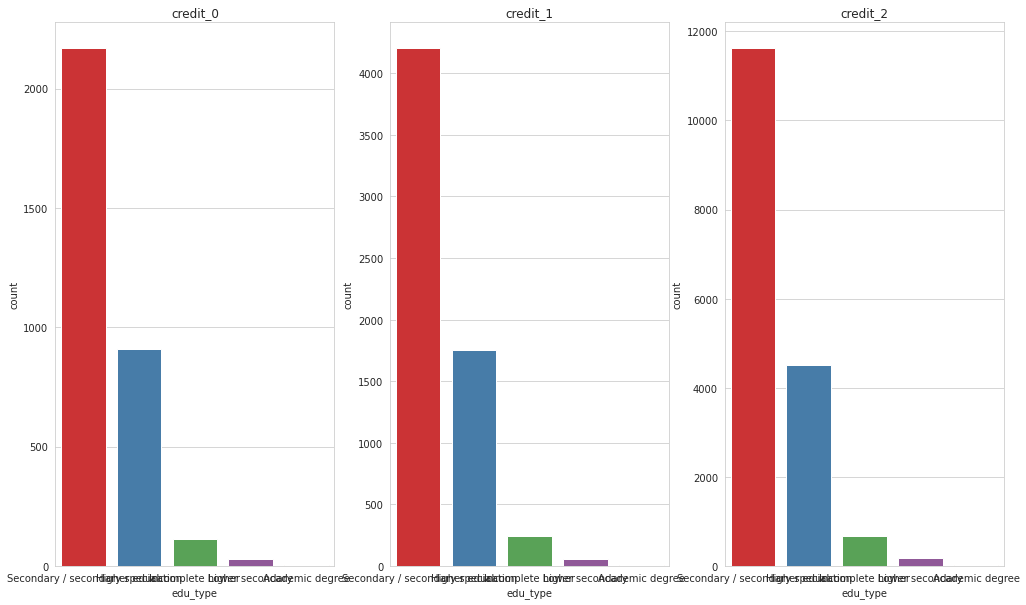

In [ ]:
# 교육 유형
chart('edu_type')

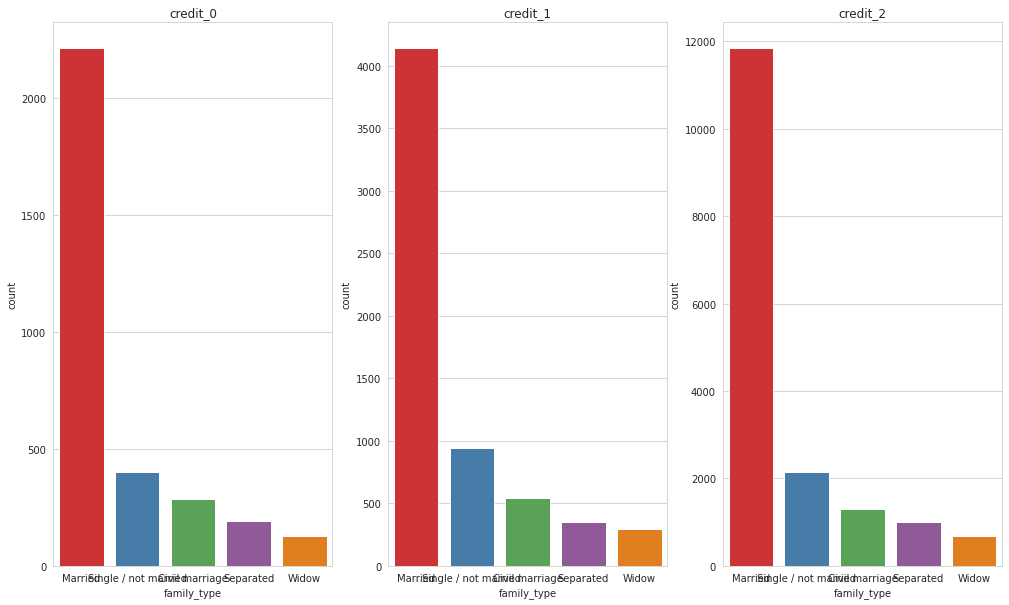

In [ ]:
# 가족 유형
chart('family_type')

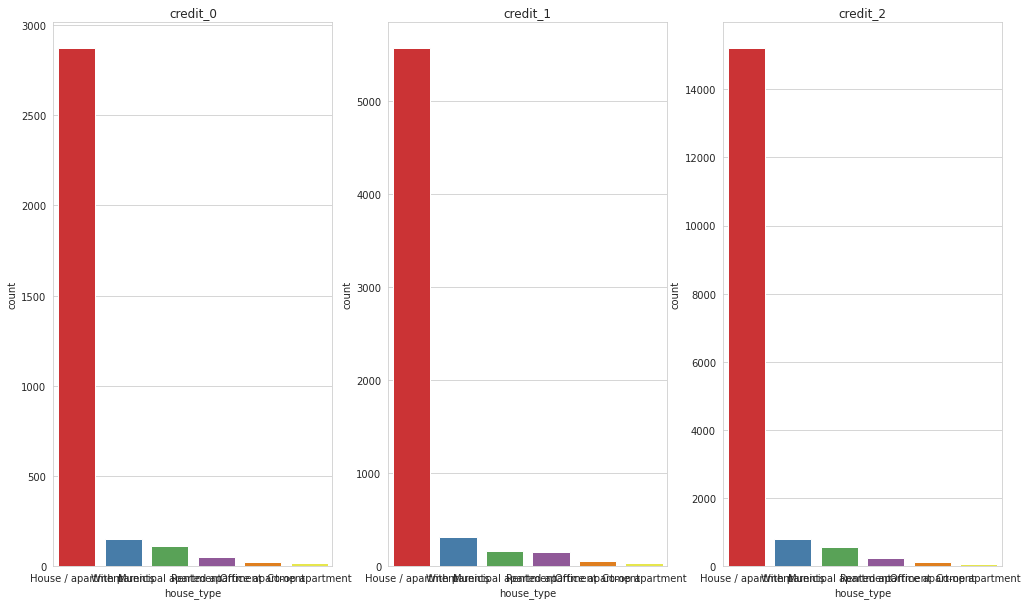

In [ ]:
# 거주 유형
chart('house_type')

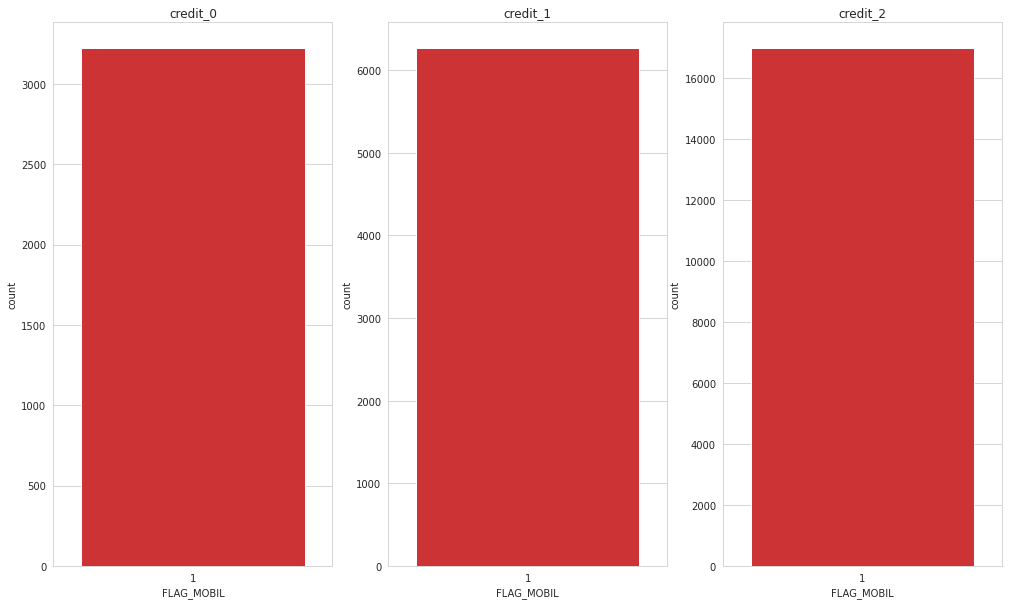

In [ ]:
# 휴대폰
chart('FLAG_MOBIL')

# 이 결과로 보면 휴대폰은 모두 가지고 있음

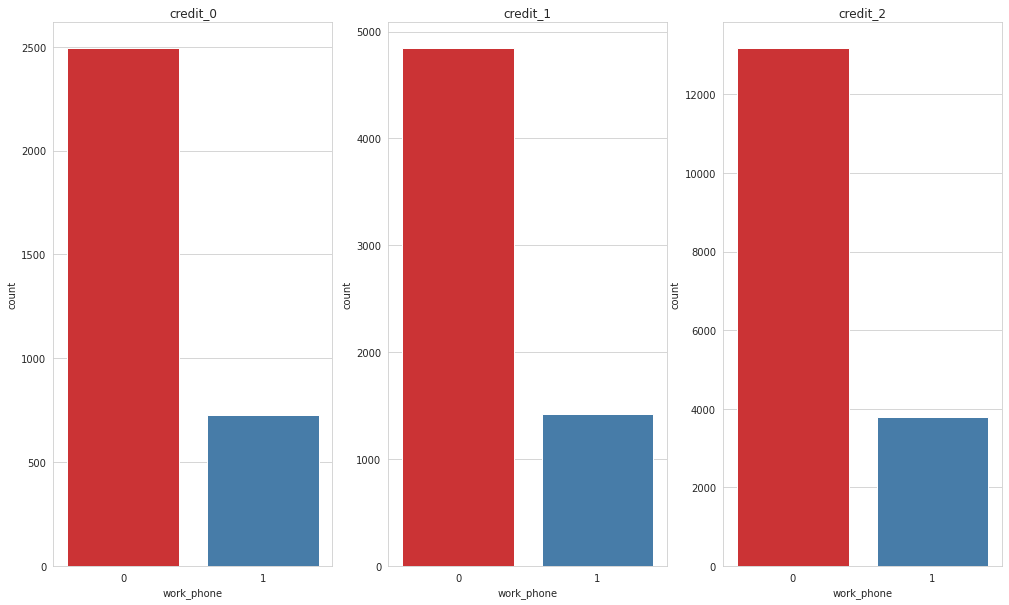

In [ ]:
# 업무용 휴대폰
chart('work_phone')

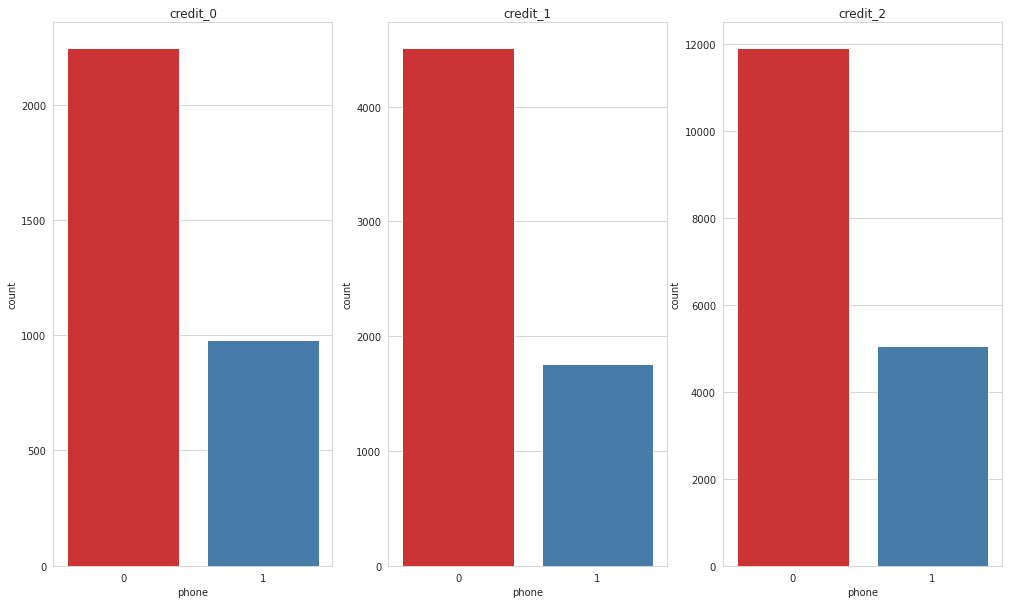

In [ ]:
# 가정용 전화기
chart('phone')

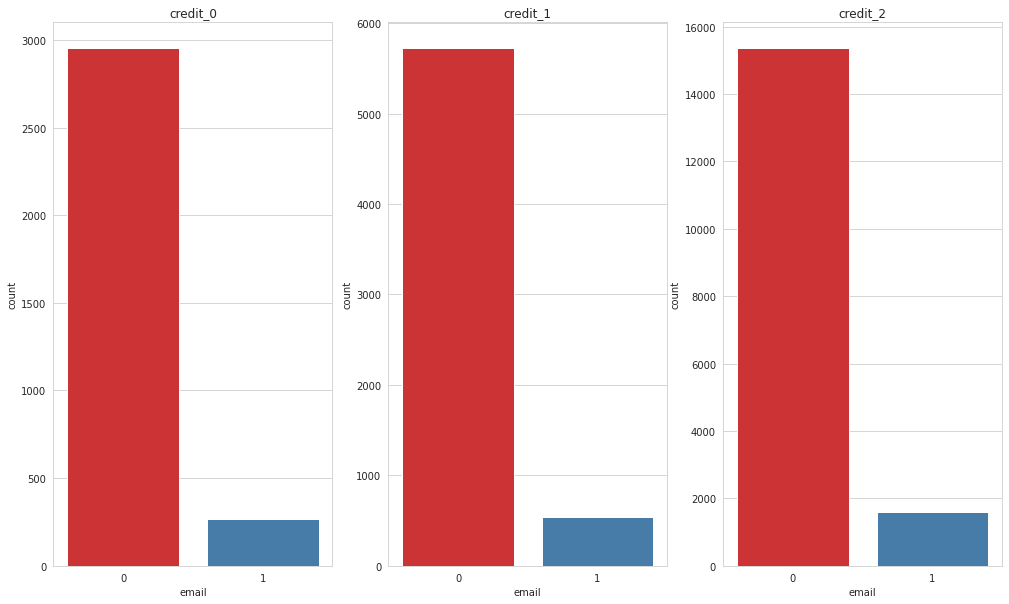

In [ ]:
# 이메일
chart('email')

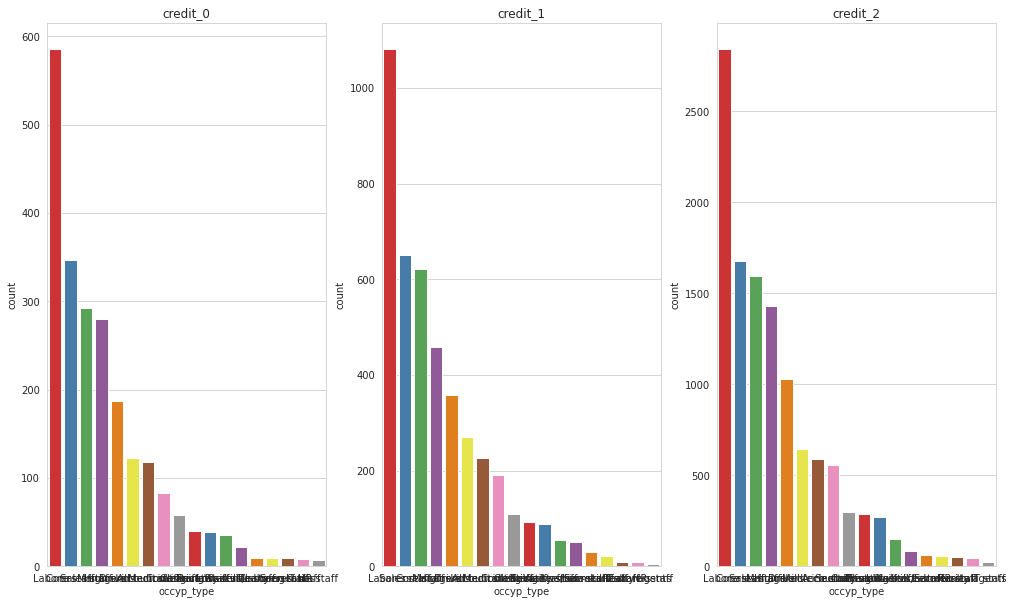

In [ ]:
chart('occyp_type')

# 유형이 많아 보기 힘듬

Text(0.5, 1.0, 'credit_2')

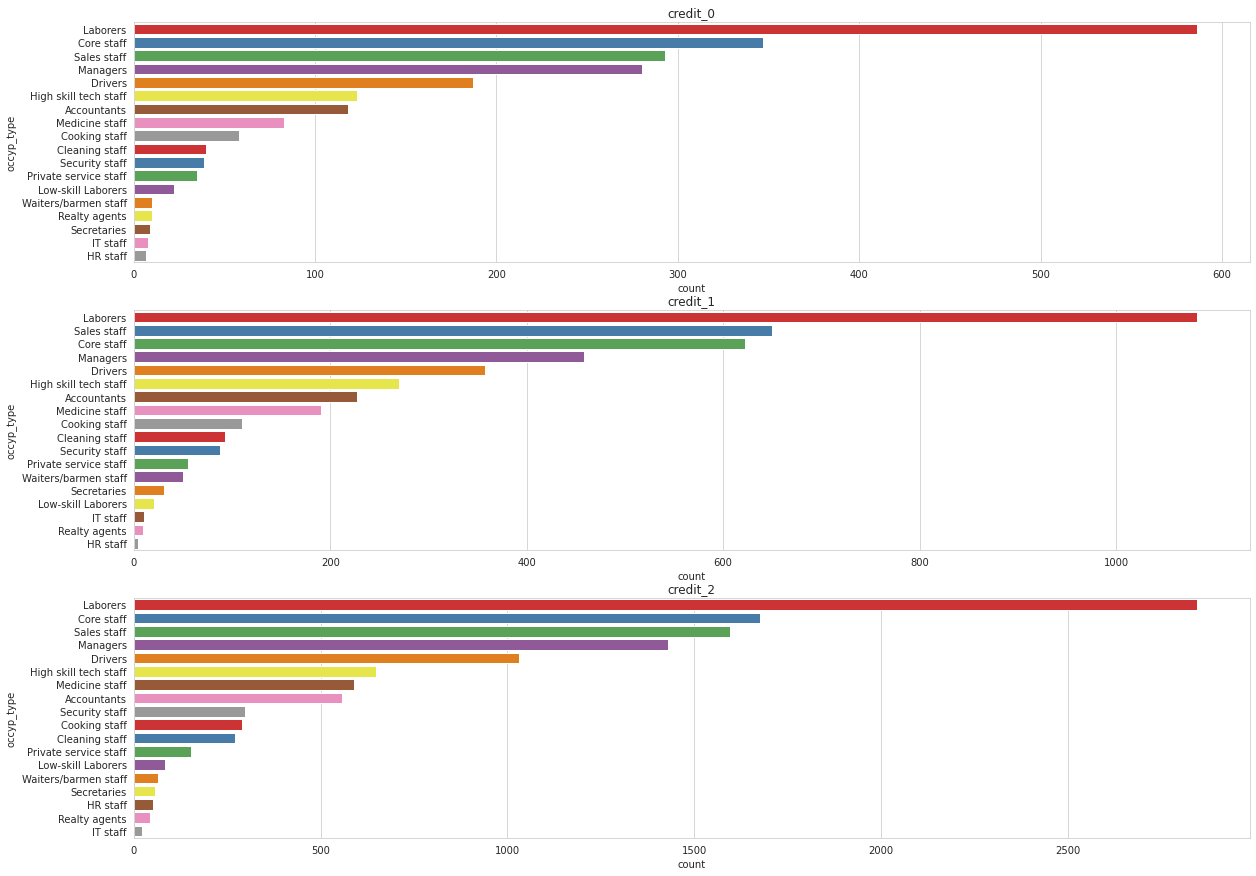

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize = (20,15))

p1 = plt.subplot(3,1,1)
graph1 = sns.countplot(y= train_0['occyp_type'],  palette='Set1', data= train_0, order = train_0['occyp_type'].value_counts().index)
plt.title("credit_0")

p2 = plt.subplot(3,1,2)
graph2 = sns.countplot(y= train_1['occyp_type'], palette='Set1',  data= train_1, order = train_1['occyp_type'].value_counts().index)
plt.title("credit_1")

p3 = plt.subplot(3,1,3)
graph3 = sns.countplot(y= train_2['occyp_type'],  palette='Set1',  data= train_2, order = train_2['occyp_type'].value_counts().index)
plt.title("credit_2")

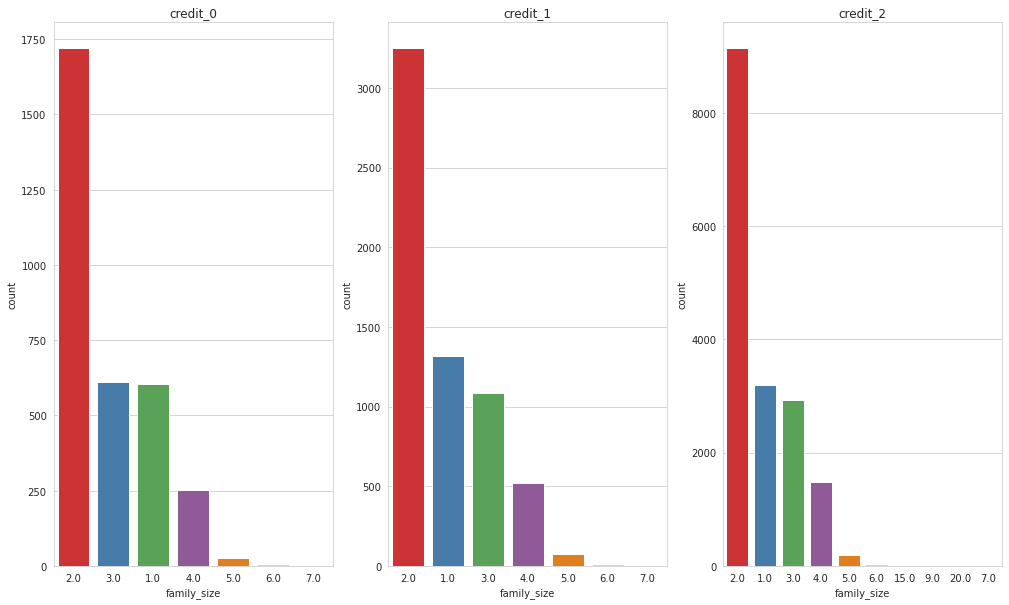

In [ ]:
# 가족 크기
chart('family_size')


```
           

*   이상치들이 종종 존재하여 이상치 제거를 할 필요가 있음
*   휴대폰은 모두다 가지고 있어 의미없으므로 제거할 필요가 있음
*   신용점수 0점과 1점, 2점 모두 비슷한 분포를 가지고 있음

```



## 중복데이터 확인

In [ ]:
train[train.drop(["index","begin_month"], axis = 1).duplicated(keep = False)].sort_values(["income_total","DAYS_BIRTH","index","begin_month"]).head(20)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1030,1030,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,-6.0,1.0
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,-2.0,1.0
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,-27.0,1.0
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,-24.0,1.0
3172,3172,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,-23770,365243,1,0,0,0,NaN,2.0,-39.0,2.0
22938,22938,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,-23770,365243,1,0,0,0,NaN,2.0,-10.0,2.0
399,399,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,-7.0,0.0
8580,8580,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,-11.0,0.0
24468,24468,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,-1.0,0.0
25500,25500,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,-20.0,0.0


# feature Engineering

## 같은 사람으로 추정되는 사람 ID 추가

* 성별, 나이, 소득총합, 소득 타입, 교육수준이 같으면 같은사람으로 취급

In [ ]:
train['personal_id'] = train['gender'] + "_" + train['DAYS_BIRTH'].astype(str) + "_" + train['income_total'].astype(str) + "_" + train['income_type'].astype(str) + "_" + train['edu_type'].astype(str)
test['personal_id'] = test['gender'] + "_" + test['DAYS_BIRTH'].astype(str) + "_" + test['income_total'].astype(str) + "_" + test['income_type'].astype(str) + "_" + test['edu_type'].astype(str)

## DAYS_BIRTH & drop

In [ ]:
def histo(feature):
  plt.hist(x=train[feature])
  plt.figure(figsize=(17,10))
  plt.show()

In [ ]:
def days_to_age(x):
  return (x*-1)/365

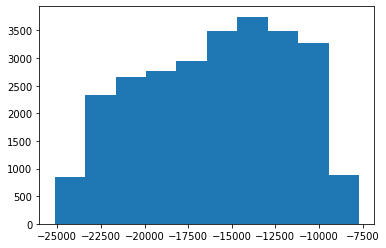

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_BIRTH')

#태어난 날이 그날로부터 -로 찍혀있어 실제 나이로 변환해야함

In [ ]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_age)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_age)

In [ ]:
train = train.drop(['FLAG_MOBIL'], axis = 1)
test = test.drop(['FLAG_MOBIL'], axis = 1)

In [ ]:
train['occyp_type'] = train['occyp_type'].fillna('Etc')
test['occyp_type'] = test['occyp_type'].fillna('Etc')

## DAYS_EMPLOYED

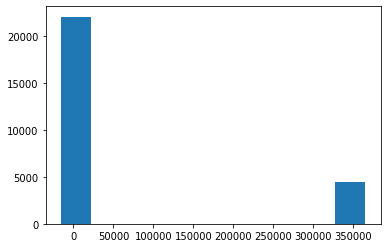

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_EMPLOYED')

In [ ]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

In [ ]:
def days_to_year(x):
  return (x/365)

In [ ]:
# 일한 날짜를 연단위로 변환

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)

In [ ]:
# 양수값들은 고용되지 않은 상태라 -1을 넣었음

train.loc[train['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = -1
test.loc[test['DAYS_EMPLOYED'] < 0 , 'DAYS_EMPLOYED'] = -1

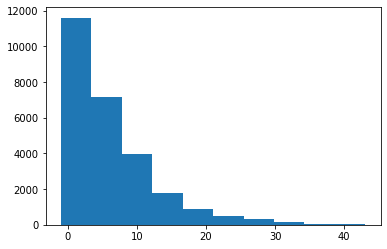

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_EMPLOYED')

## 그 외 변수들


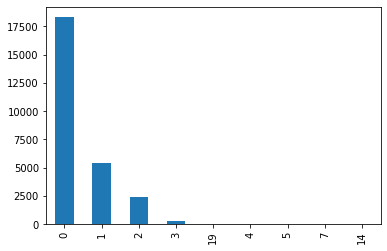

In [ ]:
train['child_num'].value_counts(sort=False).plot.bar()

In [ ]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

* income_total은 5개로 나누어 분류

(25451.999, 336600.0]     24542
(336600.0, 646200.0]       1736
(646200.0, 955800.0]        165
(955800.0, 1265400.0]         5
(1265400.0, 1575000.0]        9
Name: income_total, dtype: int64


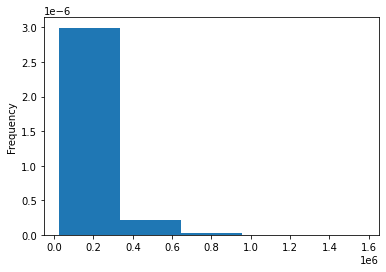

In [ ]:
print(train['income_total'].value_counts(bins=5,sort=False))
train['income_total'].plot(kind='hist',bins=5,density=True)

In [ ]:
count, bin_dividers =np.histogram(train['income_total'], bins=5)
bin_names=[int(i) for i in range(5) ]
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
count, bin_dividers =np.histogram(test['income_total'], bins=5)
bin_names=[int(i) for i in range(5) ]
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

* DAYS_BIRTH는 21세부터 68세로 6구간으로 구분

(21.061, 29.076]    2967
(29.076, 37.043]    5819
(37.043, 45.01]     6104
(45.01, 52.976]     4818
(52.976, 60.943]    4560
(60.943, 68.91]     2189
Name: DAYS_BIRTH, dtype: int64


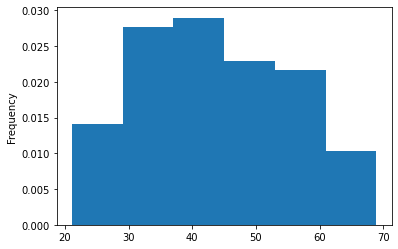

In [ ]:
print(train['DAYS_BIRTH'].value_counts(bins=6,sort=False))
train['DAYS_BIRTH'].plot(kind='hist',bins=6,density=True)

In [ ]:
count, bin_dividers =np.histogram(train['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
train['DAYS_BIRTH']=pd.cut(x=train['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
count, bin_dividers =np.histogram(test['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
test['DAYS_BIRTH']=pd.cut(x=test['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True)

(-1.045, 7.81]      18782
(7.81, 16.62]        5753
(16.62, 25.43]       1379
(25.43, 34.239]       449
(34.239, 43.049]       94
Name: DAYS_EMPLOYED, dtype: int64


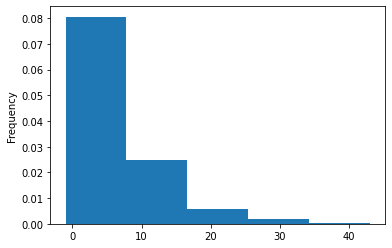

In [ ]:
print(train['DAYS_EMPLOYED'].value_counts(bins=5,sort=True))
train['DAYS_EMPLOYED'].plot(kind='hist',bins=5,density=True)

In [ ]:
train['DAYS_EMPLOYED'].loc[train['DAYS_EMPLOYED'] == -1] = 0
train['DAYS_EMPLOYED'].loc[(train['DAYS_EMPLOYED'] >0) & (train['DAYS_EMPLOYED'] <=5) ] = 1
train['DAYS_EMPLOYED'].loc[(train['DAYS_EMPLOYED'] >5) & (train['DAYS_EMPLOYED'] <=10) ] = 2
train['DAYS_EMPLOYED'].loc[(train['DAYS_EMPLOYED'] >10) & (train['DAYS_EMPLOYED'] <=25) ] = 3
train['DAYS_EMPLOYED'].loc[(train['DAYS_EMPLOYED'] >25) ] = 4

In [ ]:
test['DAYS_EMPLOYED'].loc[test['DAYS_EMPLOYED'] == -1] = 0
test['DAYS_EMPLOYED'].loc[(test['DAYS_EMPLOYED'] >0) & (test['DAYS_EMPLOYED'] <=5) ] = 1
test['DAYS_EMPLOYED'].loc[(test['DAYS_EMPLOYED'] >5) & (test['DAYS_EMPLOYED'] <=10) ] = 2
test['DAYS_EMPLOYED'].loc[(test['DAYS_EMPLOYED'] >10) & (test['DAYS_EMPLOYED'] <=25) ] = 3
test['DAYS_EMPLOYED'].loc[(test['DAYS_EMPLOYED'] >25)] = 4

In [ ]:
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_id
0,F,N,N,0,0,Commercial associate,Higher education,Married,Municipal apartment,2,3.0,0,0,0,Etc,2.0,-6.0,1.0,F_-13899_202500.0_Commercial associate_Higher ...
1,F,N,Y,1,0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,1.0,0,0,1,Laborers,3.0,-5.0,1.0,F_-11380_247500.0_Commercial associate_Seconda...
2,M,Y,Y,0,1,Working,Higher education,Married,House / apartment,3,3.0,0,1,0,Managers,2.0,-22.0,2.0,M_-19087_450000.0_Working_Higher education
3,F,N,Y,0,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2,2.0,0,1,0,Sales staff,2.0,-37.0,0.0,F_-15088_202500.0_Commercial associate_Seconda...
4,F,Y,Y,0,0,State servant,Higher education,Married,House / apartment,2,2.0,0,0,0,Managers,2.0,-26.0,2.0,F_-15037_157500.0_State servant_Higher education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,0,State servant,Secondary / secondary special,Married,House / apartment,1,2.0,0,0,0,Core staff,4.0,-2.0,1.0,F_-12079_225000.0_State servant_Secondary / se...
26453,F,N,Y,1,0,Working,Higher education,Separated,House / apartment,2,2.0,0,0,0,Etc,2.0,-47.0,2.0,F_-15291_180000.0_Working_Higher education
26454,F,Y,N,0,0,Working,Secondary / secondary special,Civil marriage,With parents,0,2.0,0,0,0,Core staff,2.0,-25.0,2.0,F_-10082_292500.0_Working_Secondary / secondar...
26455,M,N,Y,0,0,Working,Incomplete higher,Single / not married,House / apartment,0,1.0,0,0,0,Laborers,1.0,-59.0,2.0,M_-10145_171000.0_Working_Incomplete higher


# SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## One Hot Encoding

In [ ]:
train1=train.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)
test1=test.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(train.loc[:,target_col])
train2 = pd.DataFrame(en.transform(train[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

train2.head()

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(test.loc[:,target_col])
test2 = pd.DataFrame(en.transform(test[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

test2.head()

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 ftrain = pd.concat([train1, train2],axis=1)
 ftest = pd.concat([test1, test2], axis=1)

In [ ]:
print(ftrain.shape)
print(ftest.shape)

(26457, 57)
(10000, 56)


In [ ]:
!pip install -U Kaggler
from kaggler.preprocessing import LabelEncoder

     |████████████████████████████████| 829kB 8.3MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.13-cp37-cp37m-linux_x86_64.whl size=2963444 sha256=348cb87ab2a042c77b895fbf7f7de9b39a7e1fa0d53679983052d3353c2f30be
  Stored in directory: /root/.cache/pip/wheels/5e/5a/c8/be0d5aaac1a22c4d66cc3327138818c151854d56f975a81a89
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7845 sha256=44278f0eca7712354bcbe0af086f272ff97ca8ed9c698b6810052ecd63e55e58
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
cat_cols = [x for x in ftrain.columns if ftrain[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

ftrain[cat_cols] = lbe.fit_transform(ftrain[cat_cols])
ftrain.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,personal_id,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,2,3.0,0,0,0,2.0,-6.0,1.0,1466,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,1.0,0,0,1,3.0,-5.0,1.0,335,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,3,3.0,0,1,0,2.0,-22.0,2.0,872,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,2,2.0,0,1,0,2.0,-37.0,0.0,5466,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,2,2.0,0,0,0,2.0,-26.0,2.0,5983,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_cols = [x for x in ftest.columns if ftest[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

ftest[cat_cols] = lbe.fit_transform(ftest[cat_cols])
ftest.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,personal_id,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,4,0.0,0,1,0,2.0,-60.0,1030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,3,3.0,0,1,0,2.0,-36.0,1348,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,1.0,1,1,0,2.0,-40.0,2319,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4,2.0,1,0,0,2.0,-41.0,5450,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,3,4.0,1,0,0,2.0,-8.0,4040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## grid search

In [ ]:
train_x=ftrain.drop('credit', axis=1)
train_y=ftrain[['credit']]
test_x=ftest

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


estimator = SVC(kernel= 'rbf', probability=True)

param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

grid = RandomizedSearchCV(estimator, param_grid, cv=3, scoring = 'neg_log_loss', verbose = 1)

grid.fit(train_x, train_y)

print('Best parameters:', grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


## SVC

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability = True)
svm.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
submission.iloc[:,1:] = svm.predict_proba(test_x)
submission

,index,0,1,2
0,26457,0.117288,0.235928,0.646784
1,26458,0.116927,0.236550,0.646523
2,26459,0.116368,0.238711,0.644921
3,26460,0.122003,0.239902,0.638095
4,26461,0.117186,0.234175,0.648639
...,...,...,...,...
9995,36452,0.116590,0.234784,0.648626
9996,36453,0.116761,0.237286,0.645953
9997,36454,0.115952,0.238383,0.645664
9998,36455,0.116676,0.234655,0.648669


In [ ]:
submission1 = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_ID_noparam_cv7.csv')
submission2 = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_ID_0605_v1.csv')

# LGBM Classifier

## labeling data

* https://github.com/jeongyoonlee/Kaggler
* Kaggler라는 패키지의 LabelEncoder 사용

In [ ]:
!pip install -U Kaggler
from kaggler.preprocessing import LabelEncoder

     |████████████████████████████████| 829kB 23.5MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.9-cp37-cp37m-linux_x86_64.whl size=2962049 sha256=32adb71cb7c28f44cc5c106100d94761f9ab354d623ba02dbb76cd24133f97fc
  Stored in directory: /root/.cache/pip/wheels/12/11/a7/69466e9d72ce24c73519ab2f3b3e035ba48d702badd1bcee61
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7845 sha256=89fbfb72ebf21c622c95a2765a8976fff875e9df9cceb32210dafbecc4cd3e47
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         26457 non-null  object  
 1   car            26457 non-null  object  
 2   reality        26457 non-null  object  
 3   child_num      26457 non-null  int64   
 4   income_total   26457 non-null  category
 5   income_type    26457 non-null  object  
 6   edu_type       26457 non-null  object  
 7   family_type    26457 non-null  object  
 8   house_type     26457 non-null  object  
 9   DAYS_BIRTH     26457 non-null  category
 10  DAYS_EMPLOYED  26457 non-null  float64 
 11  work_phone     26457 non-null  int64   
 12  phone          26457 non-null  int64   
 13  email          26457 non-null  int64   
 14  occyp_type     26457 non-null  object  
 15  family_size    26457 non-null  float64 
 16  begin_month    26457 non-null  float64 
 17  credit         26457 non-null  

In [ ]:
cat_cols = [x for x in train.columns if train[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

train[cat_cols] = lbe.fit_transform(train[cat_cols])
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_id
0,0,0,1,0,0,1,1,0,2,2,3.0,0,0,0,0,2.0,-6.0,1.0,1695
1,0,0,0,1,0,1,0,2,0,1,1.0,0,0,1,1,3.0,-5.0,1.0,350
2,1,1,0,0,1,0,1,0,0,3,3.0,0,1,0,4,2.0,-22.0,2.0,854
3,0,0,0,0,0,1,0,0,0,2,2.0,0,1,0,3,2.0,-37.0,0.0,4184
4,0,1,0,0,0,3,1,0,0,2,2.0,0,0,0,4,2.0,-26.0,2.0,8333


In [ ]:
cat_cols = [x for x in test.columns if test[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

test[cat_cols] = lbe.fit_transform(test[cat_cols])
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,personal_id
0,1,1,1,0,0,2,0,2,0,4,0.0,0,1,0,0,2.0,-60.0,729
1,0,0,0,0,0,3,1,0,0,3,3.0,0,1,0,3,2.0,-36.0,1892
2,0,0,0,0,0,0,0,0,0,2,1.0,1,1,0,1,2.0,-40.0,2170
3,1,1,1,0,0,1,0,0,0,4,2.0,1,0,0,5,2.0,-41.0,4493
4,0,1,0,0,0,3,1,0,0,3,4.0,1,0,0,4,2.0,-8.0,3701


In [ ]:
(train['personal_id'] == 1827).sum()

5

In [ ]:
(test['personal_id'] == 639).sum()

3

In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

## grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


estimator = LGBMClassifier(objective='multiclass')

param_grid = {
    'learning_rate': [0.05,0.1,0.01,0.25,0.5],
    'max_depth': [20,50,100,200],
    'num_leaves': [50,100,200,300,500]
}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'neg_log_loss', verbose = 1)

grid.fit(train_x, train_y)

print('Best parameters:', grid.best_params_)
#1st try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 700, 'n_estimators': 100}
#2nd try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 50}
#3nd try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}
#4th try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}
#5th try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 700, 'n_estimators': 100}
#6th try ) Best parameters: {'learning_rate': 0.05, 'max_depth': 50, 'num_leaves': 300}
#7th try ) Best parameters: {'learning_rate': 0.05, 'max_depth': 50, 'num_leaves': 300}


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 18.8min finished


Best parameters: {'learning_rate': 0.05, 'max_depth': 50, 'num_leaves': 300}


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.97938156, 1.335429  , 1.99727869, 2.63595257, 3.65467486,
        0.95906963, 1.34499402, 2.01261024, 2.69386783, 3.88809986,
        0.96066756, 1.33180861, 1.9879149 , 2.67067966, 3.86702871,
        0.95950708, 1.31199536, 1.99660883, 2.66076765, 3.92161942,
        0.90818696, 1.26948762, 1.91817598, 2.55720749, 3.38654809,
        0.90663409, 1.25469594, 1.91183367, 2.54069343, 3.81488037,
        0.90536151, 1.26605306, 1.92347617, 2.53400788, 3.82305832,
        0.8979898 , 1.25994792, 1.89528322, 2.55289807, 3.8346004 ,
        1.07065268, 1.45507607, 2.17382975, 2.79824209, 3.84079075,
        1.05745902, 1.45914531, 2.16110206, 2.75629225, 3.93367071,
        1.0746521 , 1.45967035, 2.16814127, 2.74629674, 3.88767438,
        1.07252698, 1.45903168, 2.17433128, 2.77903876, 3.89709835,
        0.83447962, 1.16219983, 1.8128912 , 2.46107907, 3.3378334 ,
        0.8342732 , 1.16509628, 1.79076886, 2.46849976, 3.71571603,
        0.84193792, 1.17796059,

## 코드공유의 StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train, train_y):
    folds.append((train_idx, valid_idx))

In [ ]:
from lightgbm import LGBMClassifier

models={}

for fold in range(7):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(learning_rate = 0.05,
                         max_depth = 50,
                         num_leaves = 300,
                         n_estimators=1000,
                         objective = 'multiclass')
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=100,
           verbose=10)
    models[fold]=lgb
    print(f'================================================================================\n\n')

       

====================================1============================================
Training until validation scores don't improve for 100 rounds.
[10]	training's multi_logloss: 0.778434	valid_1's multi_logloss: 0.816469
[20]	training's multi_logloss: 0.713091	valid_1's multi_logloss: 0.782824
[30]	training's multi_logloss: 0.664633	valid_1's multi_logloss: 0.76397
[40]	training's multi_logloss: 0.625677	valid_1's multi_logloss: 0.752073
[50]	training's multi_logloss: 0.593146	valid_1's multi_logloss: 0.744199
[60]	training's multi_logloss: 0.565456	valid_1's multi_logloss: 0.738663
[70]	training's multi_logloss: 0.540423	valid_1's multi_logloss: 0.7344
[80]	training's multi_logloss: 0.517442	valid_1's multi_logloss: 0.731559
[90]	training's multi_logloss: 0.496677	valid_1's multi_logloss: 0.728327
[100]	training's multi_logloss: 0.477949	valid_1's multi_logloss: 0.727207
[110]	training's multi_logloss: 0.460544	valid_1's multi_logloss: 0.726542
[120]	training's multi_logloss: 0.444451	v

In [ ]:
submission.iloc[:,1:]=0
for fold in range(7):
    submission.iloc[:,1:] += models[fold].predict_proba(test_x)/7

In [ ]:
submission

,index,0,1,2
0,26457,0.093355,0.140560,0.766085
1,26458,0.104102,0.164353,0.731546
2,26459,0.077825,0.185705,0.736470
3,26460,0.103408,0.102366,0.794226
4,26461,0.197388,0.132455,0.670157
...,...,...,...,...
9995,36452,0.092078,0.140617,0.767305
9996,36453,0.121498,0.385211,0.493291
9997,36454,0.080109,0.191750,0.728141
9998,36455,0.066229,0.178457,0.755314


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_ID_noparam_cv7.csv', index=False)

## fold없이 스스로 구축

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, stratify= train_y)

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(learning_rate = 0.05,
                     max_depth = 50,
                     num_leaves = 300,
                     n_estimators = 1000,
                     objective = 'multiclass')

clf.fit(X_train, y_train,
        eval_set =[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds = 50,
        verbose = 1)

[1]	training's multi_logloss: 0.867947	valid_1's multi_logloss: 0.872411
Training until validation scores don't improve for 50 rounds.
[2]	training's multi_logloss: 0.854517	valid_1's multi_logloss: 0.863696
[3]	training's multi_logloss: 0.842079	valid_1's multi_logloss: 0.85578
[4]	training's multi_logloss: 0.830362	valid_1's multi_logloss: 0.847862
[5]	training's multi_logloss: 0.819553	valid_1's multi_logloss: 0.841382
[6]	training's multi_logloss: 0.809377	valid_1's multi_logloss: 0.83516
[7]	training's multi_logloss: 0.799865	valid_1's multi_logloss: 0.829491
[8]	training's multi_logloss: 0.790898	valid_1's multi_logloss: 0.824539
[9]	training's multi_logloss: 0.78226	valid_1's multi_logloss: 0.81979
[10]	training's multi_logloss: 0.774153	valid_1's multi_logloss: 0.81553
[11]	training's multi_logloss: 0.766439	valid_1's multi_logloss: 0.811542
[12]	training's multi_logloss: 0.759037	valid_1's multi_logloss: 0.807965
[13]	training's multi_logloss: 0.751862	valid_1's multi_logloss:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=50,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=300,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
submission.iloc[:,1:] = clf.predict_proba(test_x)
submission

,index,0,1,2
0,26457,0.038483,0.275680,0.685837
1,26458,0.066253,0.073083,0.860663
2,26459,0.189771,0.195166,0.615063
3,26460,0.087595,0.243661,0.668745
4,26461,0.118168,0.146519,0.735313
...,...,...,...,...
9995,36452,0.065741,0.097124,0.837135
9996,36453,0.112335,0.233832,0.653832
9997,36454,0.139350,0.220835,0.639815
9998,36455,0.071121,0.168088,0.760791


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_ID_nofold_v1.csv', index=False)

# TabNetClassifier

* 2020년 12월 Google Cloud AI팀에서 발표한 정형데이터를 위한 딥러닝 알고리즘

* https://openreview.net/forum?id=BylRkAEKDH

## One Hot Encoding

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         26457 non-null  int64   
 1   car            26457 non-null  int64   
 2   reality        26457 non-null  int64   
 3   child_num      26457 non-null  int64   
 4   income_total   26457 non-null  category
 5   income_type    26457 non-null  int64   
 6   edu_type       26457 non-null  int64   
 7   family_type    26457 non-null  int64   
 8   house_type     26457 non-null  int64   
 9   DAYS_BIRTH     26457 non-null  category
 10  DAYS_EMPLOYED  26457 non-null  float64 
 11  work_phone     26457 non-null  int64   
 12  phone          26457 non-null  int64   
 13  email          26457 non-null  int64   
 14  occyp_type     26457 non-null  int64   
 15  family_size    26457 non-null  float64 
 16  begin_month    26457 non-null  float64 
 17  credit         26457 non-null  

In [ ]:
train1=train.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)
test1=test.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(train.loc[:,target_col])
train2 = pd.DataFrame(en.transform(train[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

train2.head()

,gender_0,gender_1,car_0,car_1,reality_0,reality_1,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,edu_type_0,edu_type_1,edu_type_2,edu_type_3,edu_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(test.loc[:,target_col])
test2 = pd.DataFrame(en.transform(test[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

test2.head()

,gender_0,gender_1,car_0,car_1,reality_0,reality_1,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,edu_type_0,edu_type_1,edu_type_2,edu_type_3,edu_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 ftrain = pd.concat([train1, train2],axis=1)
 ftest = pd.concat([test1, test2], axis=1)

In [ ]:
print(ftrain.shape)
print(ftest.shape)

(26457, 57)
(10000, 56)


In [ ]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   child_num      26457 non-null  int64   
 1   income_total   26457 non-null  category
 2   DAYS_BIRTH     26457 non-null  category
 3   DAYS_EMPLOYED  26457 non-null  float64 
 4   work_phone     26457 non-null  int64   
 5   phone          26457 non-null  int64   
 6   email          26457 non-null  int64   
 7   family_size    26457 non-null  float64 
 8   begin_month    26457 non-null  float64 
 9   credit         26457 non-null  float64 
 10  personal_id    26457 non-null  int64   
 11  gender_0       26457 non-null  float64 
 12  gender_1       26457 non-null  float64 
 13  car_0          26457 non-null  float64 
 14  car_1          26457 non-null  float64 
 15  reality_0      26457 non-null  float64 
 16  reality_1      26457 non-null  float64 
 17  income_type_0  26457 non-null  

In [ ]:
!pip install -U Kaggler
from kaggler.preprocessing import LabelEncoder

     |████████████████████████████████| 829kB 7.4MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.9-cp37-cp37m-linux_x86_64.whl size=2962070 sha256=dcb5c8b205726d0912e8d47aa4ea9a91399fbff9e736716af994238c692a263e
  Stored in directory: /root/.cache/pip/wheels/12/11/a7/69466e9d72ce24c73519ab2f3b3e035ba48d702badd1bcee61
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7845 sha256=b272dcd6cab80f1478a8b7c944b6a9f1540dc1ec79868c8561fdaded7243cc5c
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
cat_cols = [x for x in ftrain.columns if ftrain[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

ftrain[cat_cols] = lbe.fit_transform(ftrain[cat_cols])
ftrain.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,personal_id,gender_0,gender_1,car_0,car_1,reality_0,reality_1,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,edu_type_0,edu_type_1,edu_type_2,edu_type_3,edu_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
0,0,0,2,3.0,0,0,0,2.0,-6.0,1.0,1695,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,1.0,0,0,1,3.0,-5.0,1.0,350,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,3,3.0,0,1,0,2.0,-22.0,2.0,854,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,2,2.0,0,1,0,2.0,-37.0,0.0,4184,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2,2.0,0,0,0,2.0,-26.0,2.0,8333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_cols = [x for x in ftest.columns if ftest[x].dtype == 'object']

lbe = LabelEncoder(min_obs=1)

ftest[cat_cols] = lbe.fit_transform(ftest[cat_cols])
ftest.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,personal_id,gender_0,gender_1,car_0,car_1,reality_0,reality_1,income_type_0,income_type_1,income_type_2,income_type_3,income_type_4,edu_type_0,edu_type_1,edu_type_2,edu_type_3,edu_type_4,family_type_0,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5,occyp_type_0,occyp_type_1,occyp_type_2,occyp_type_3,occyp_type_4,occyp_type_5,occyp_type_6,occyp_type_7,occyp_type_8,occyp_type_9,occyp_type_10,occyp_type_11,occyp_type_12,occyp_type_13,occyp_type_14,occyp_type_15,occyp_type_16,occyp_type_17,occyp_type_18
0,0,0,4,0.0,0,1,0,2.0,-60.0,729,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,3,3.0,0,1,0,2.0,-36.0,1892,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,1.0,1,1,0,2.0,-40.0,2170,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4,2.0,1,0,0,2.0,-41.0,4493,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,3,4.0,1,0,0,2.0,-8.0,3701,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## grid search

In [ ]:
!pip uninstall -y typing # this should avoid  AttributeError: type object 'Callable' has no attribute '_abc_registry'

!pip install  "git+https://github.com/dreamquark-ai/tabnet.git@develop#egg=pytorch_tabnet" --upgrade

  Cloning https://github.com/dreamquark-ai/tabnet.git (to revision develop) to /tmp/pip-install-5qmpkjyy/pytorch-tabnet
  Running command git clone -q https://github.com/dreamquark-ai/tabnet.git /tmp/pip-install-5qmpkjyy/pytorch-tabnet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-3.1.1-cp37-none-any.whl size=39657 sha256=b635923680180f648593597b47cfb7555f6373bc3f0cf06c2d6a2d47b11453df
  Stored in directory: /tmp/pip-ephem-wheel-cache-cy_cs2hy/wheels/a5/fe/e1/d7be493728d1fb7284583f5449d4cad80139ee994ef420f522
Successfully built pytorch-tabnet


In [ ]:
train_x=ftrain.drop('credit', axis=1)
train_y=ftrain[['credit']]
test_x=ftest

In [ ]:
ar_x = np.array(train_x)
ar_y = np.array(train_y)
ar_t = np.array(test_x)

In [ ]:
from sklearn.model_selection import GridSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
import torch



estimator = TabNetClassifier ()

param_grid = {
    'n_d': [8, 30, 64],
    'n_steps': [3, 6, 9],
    'gamma': [1.3, 1.7, 2.0]
}

fit_params = {
   'patience' : 30
}

grid = GridSearchCV(estimator,
                    param_grid,
                    cv=3,
                    scoring = 'neg_log_loss',
                    verbose = 10)

grid.fit(ar_x,ar_y[:,0], **fit_params)


ModuleNotFoundError: ignored

In [ ]:
grid.best_params_

{'gamma': 2.0, 'n_d': 64, 'n_steps': 3}

* 런타임 끊김으로 인해 값 구할 수 없음
* 값들의 범위를 줄이고 cv를 5 -> 3 으로 낮춤
* cv = 3으로 해서 2시간 30분정도 걸림

##TabNet

In [ ]:
!pip uninstall -y typing # this should avoid  AttributeError: type object 'Callable' has no attribute '_abc_registry'

!pip install  "git+https://github.com/dreamquark-ai/tabnet.git@develop#egg=pytorch_tabnet" --upgrade

  Cloning https://github.com/dreamquark-ai/tabnet.git (to revision develop) to /tmp/pip-install-py97h1h3/pytorch-tabnet
  Running command git clone -q https://github.com/dreamquark-ai/tabnet.git /tmp/pip-install-py97h1h3/pytorch-tabnet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-3.1.1-cp37-none-any.whl size=39657 sha256=b635923680180f648593597b47cfb7555f6373bc3f0cf06c2d6a2d47b11453df
  Stored in directory: /tmp/pip-ephem-wheel-cache-w5is6pls/wheels/a5/fe/e1/d7be493728d1fb7284583f5449d4cad80139ee994ef420f522
Successfully built pytorch-tabnet


In [ ]:
train_x=ftrain.drop('credit', axis=1)
train_y=ftrain[['credit']]
test_x=ftest

In [ ]:
#validation 나눠서
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, stratify= train_y)


In [ ]:
ar_train_x = np.array(X_train)
ar_val_x = np.array(X_val)
ar_train_y = np.array(y_train)
ar_val_y = np.array(y_val)
ar_test_x = np.array(test_x)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier(gamma=2.0,
                       n_d = 64,
                       n_a = 64,
                       n_steps = 3)

clf.fit(
  X_train = ar_train_x, y_train = ar_train_y[:,0],
  eval_set=[(ar_train_x, ar_train_y[:,0]), (ar_val_x, ar_val_y[:,0])],
  eval_name=['train', 'valid'],
  eval_metric = ['logloss'],
  max_epochs = 1000,
  patience=50)
#  weights = 1,
#  batch_size = 2000,
#  virtual_batch_size = 200
#)


Device used : cuda
epoch 0  | loss: 1.09029 | train_logloss: 0.91626 | valid_logloss: 0.92503 |  0:00:01s
epoch 1  | loss: 0.93328 | train_logloss: 0.90151 | valid_logloss: 0.90129 |  0:00:03s
epoch 2  | loss: 0.89685 | train_logloss: 0.88276 | valid_logloss: 0.88448 |  0:00:04s
epoch 3  | loss: 0.89233 | train_logloss: 0.88329 | valid_logloss: 0.88396 |  0:00:05s
epoch 4  | loss: 0.87807 | train_logloss: 0.87562 | valid_logloss: 0.87453 |  0:00:07s
epoch 5  | loss: 0.87692 | train_logloss: 0.87464 | valid_logloss: 0.87629 |  0:00:08s
epoch 6  | loss: 0.86911 | train_logloss: 0.86718 | valid_logloss: 0.86988 |  0:00:09s
epoch 7  | loss: 0.85338 | train_logloss: 0.86953 | valid_logloss: 0.87457 |  0:00:11s
epoch 8  | loss: 0.84191 | train_logloss: 0.8553  | valid_logloss: 0.85865 |  0:00:12s
epoch 9  | loss: 0.82836 | train_logloss: 0.8481  | valid_logloss: 0.85018 |  0:00:13s
epoch 10 | loss: 0.82581 | train_logloss: 0.84492 | valid_logloss: 0.84909 |  0:00:15s
epoch 11 | loss: 0.82493

In [ ]:
preds = clf.predict_proba(ar_test_x)

In [ ]:
preds

array([[0.05132601, 0.06578175, 0.88289225],
       [0.0346256 , 0.1177199 , 0.84765446],
       [0.07513182, 0.17993928, 0.74492884],
       ...,
       [0.02881498, 0.15994482, 0.81124026],
       [0.27061456, 0.16603097, 0.56335455],
       [0.07557729, 0.16557017, 0.75885254]], dtype=float32)

In [ ]:
submission1.iloc[:,1:] = preds
submission1

,index,0,1,2
0,26457,0.051326,0.065782,0.882892
1,26458,0.034626,0.117720,0.847654
2,26459,0.075132,0.179939,0.744929
3,26460,0.054680,0.140405,0.804914
4,26461,0.018623,0.108166,0.873211
...,...,...,...,...
9995,36452,0.025321,0.095109,0.879570
9996,36453,0.161705,0.228740,0.609556
9997,36454,0.028815,0.159945,0.811240
9998,36455,0.270615,0.166031,0.563355


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_ID_0605_v1.csv', index=False)

* onehot encoding 하고 ID 칼럼 labeling (valid set 나눔)& GridSearch로 gamma = 2.0, n_d = 64, n_a = 64, n_steps = 3 /  lb(private) = 0.8051

# 앙상블 

## tabnet & lgbm

In [ ]:
submission1 = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_ID_noparam_cv7.csv') #lgbm
submission2 = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_ID_0605_v1.csv') #tabnet

In [ ]:
final_submission.iloc[:,1:] = (submission1.iloc[:,1:] + submission2.iloc[:,1:])/2
final_submission

In [ ]:
final_submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_lgbm_v1.csv', index=False)

##tabnet & lgbm & SVC

In [ ]:
final_submission.iloc[:,1:] = (submission.iloc[:,1:] + submission1.iloc[:,1:] + submission2.iloc[:,1:])/3

In [ ]:
final_submission

,index,0,1,2
0,26457,0.098675,0.168094,0.733231
1,26458,0.102412,0.182526,0.715062
2,26459,0.119786,0.228044,0.652170
3,26460,0.119460,0.189701,0.690840
4,26461,0.129727,0.188855,0.681418
...,...,...,...,...
9995,36452,0.119049,0.204400,0.676551
9996,36453,0.103783,0.217126,0.679091
9997,36454,0.104661,0.185025,0.710314
9998,36455,0.087776,0.180905,0.731319


In [ ]:
final_submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_lgbm_svc_v1.csv', index=False)